# Рубежный контроль №1
Выполнил: Ван Пэй
Группа: ИУ5И-22М
Вариант 16
# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

health=pd.read_csv('C:/Users/王沛/Downloads/health.csv')
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Дополнительные:
Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

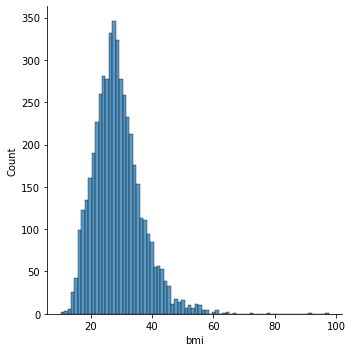

In [13]:
sns.displot(health['bmi'])

# Задача №16.
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).

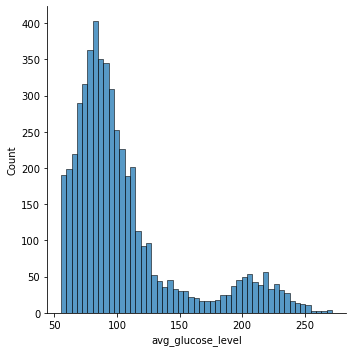

In [2]:
sns.displot(health['avg_glucose_level'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:1.5722838665030459
Kurtosis:1.6804785404038278


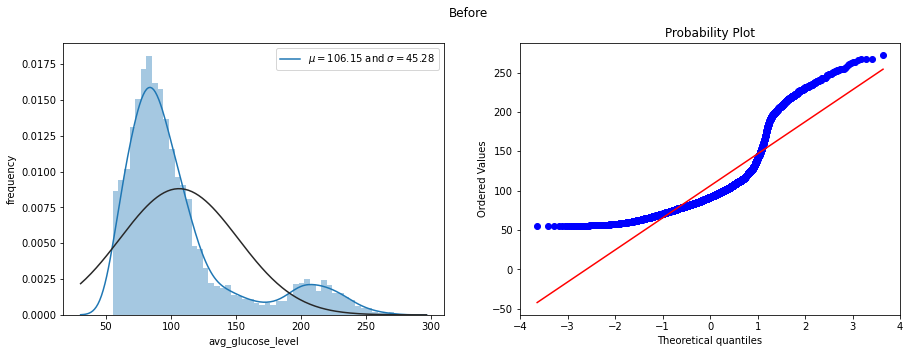

In [3]:
fig=plt.figure(figsize=(15,5))
#pic1
plt.subplot(1,2,1)
sns.distplot(health['avg_glucose_level'],fit=norm)
(mu,sigma)=norm.fit(health['avg_glucose_level'])
plt.legend(['$\mu=${:.2f} and $\sigma=${:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('frequency')
#pic2
plt.subplot(1,2,2)
res=stats.probplot(health['avg_glucose_level'],plot=plt)
plt.suptitle('Before')
print(f"Skewness:{health['avg_glucose_level'].skew()}")
print(f"Kurtosis:{health['avg_glucose_level'].kurt()}")

In [4]:
health.avg_glucose_level,lambda_=stats.boxcox(health.avg_glucose_level)
print(lambda_)

-1.0568324993842568


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:0.08329904162034814
Kurtosis:-0.49760422361296763


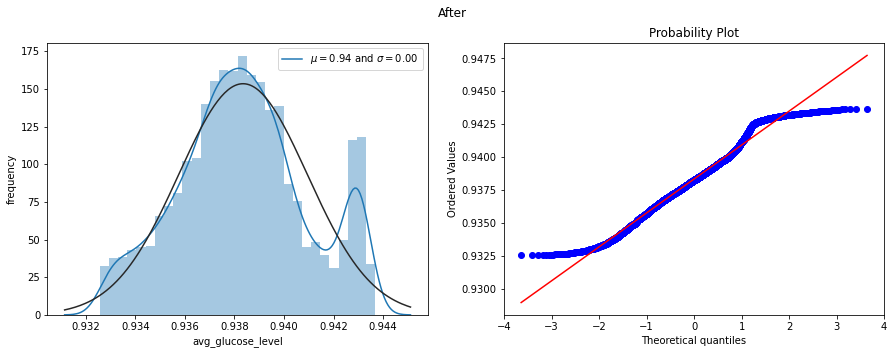

In [5]:
fig=plt.figure(figsize=(15,5))
#pic1
plt.subplot(1,2,1)
sns.distplot(health['avg_glucose_level'],fit=norm)
(mu,sigma)=norm.fit(health['avg_glucose_level'])
plt.legend(['$\mu=${:.2f} and $\sigma=${:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('frequency')
#pic2
plt.subplot(1,2,2)
res=stats.probplot(health['avg_glucose_level'],plot=plt)
plt.suptitle('After')
print(f"Skewness:{health['avg_glucose_level'].skew()}")
print(f"Kurtosis:{health['avg_glucose_level'].kurt()}")

# Задача №36.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.

In [6]:
X=health.drop(['avg_glucose_level','id'], axis = 1)._get_numeric_data()
y=health.avg_glucose_level

In [7]:
X.shape

(5110, 5)

In [8]:
X.isnull().sum()

age                0
hypertension       0
heart_disease      0
bmi              201
stroke             0
dtype: int64

In [9]:
import sklearn.impute
import sklearn.preprocessing

mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_bmi = mean_imp.fit_transform(X[["bmi"]])
X["bmi"] = mean_bmi
X.isnull().sum()

age              0
hypertension     0
heart_disease    0
bmi              0
stroke           0
dtype: int64

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
selector=SelectKBest(mutual_info_regression,k=5)
selector.fit(X,y)
X_selected=selector.transform(X)
X_selected.shape

(5110, 5)

In [11]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2

In [12]:
X.columns[selector.get_support(indices=True)].tolist()

['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']